In [2]:
import pandas as pd
import numpy as np
import warnings 
warnings.filterwarnings('ignore')

In [3]:
sales_df = pd.read_csv('Advertising.csv')
sales_df.head()

,Unnamed: 0,TV,Radio,Newspaper,Sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


In [4]:
X = sales_df[['TV', 'Radio', 'Newspaper']]
Y = sales_df['Sales']

In [5]:
Y = np.array( ( Y - Y.mean())/Y.std())
X = X.apply( lambda rec: (rec - rec.mean())/ rec.std(), axis = 0)

#### Method 1 = Implementing the gradient descent algorithm

In [7]:
import random 
def initialize(dim) :
    np.random.seed(seed = 42)
    random.seed(42)
    b = random.random()
    w = np.random.rand(dim)

    return b, w

In [8]:
b, w = initialize( 3 )
print ("Bias: ", b, "Weights: ", w)

Bias:  0.6394267984578837 Weights:  [0.37454012 0.95071431 0.73199394]


#### Method 2 = Predict Y values from the Bias and Weights

In [10]:
def predict_Y (b, w, X):
    return b + np.matmul(X, w)

In [11]:
b, w = initialize (3)
Y_hat = predict_Y(b, w, X)
Y_hat[0:10]

0    3.231496
1    1.707849
2    2.824761
3    2.753090
4    0.924486
5    3.171365
6    0.622344
7   -0.349354
8   -2.313095
9   -0.768030
dtype: float64

#### Method 3 = Calculate the Cost Function - MSE

In [13]:
import math
def get_cost (Y, Y_hat ):
    Y_resid = Y - Y_hat
    return np.sum(np.matmul( Y_resid.T, Y_resid))/ len(Y_resid)

In [14]:
b, w = initialize(3)
Y_hat = predict_Y(b,w,X)
get_cost (Y, Y_hat)

1.53031001985059

#### Method 4 = Update the Bias and Weights

In [16]:
def update_beta(x, y, y_hat, b_0, w_0, learning_rate):
    db = (np.sum( y_hat - y) * 2) / len(y)
    dw = (np.dot((y_hat - y), x) * 2)/ len(y)
    b_1 = b_0 - learning_rate * db
    w_1 = w_0 - learning_rate * dw
    return b_1, w_1

In [17]:
b, w = initialize(3)
print( "After Initialization - Bias: ", b, "Weights: ", w)
Y_hat = predict_Y(b, w, X)
b, w = update_beta(X,Y, Y_hat, b, w, 0.01)
print( "After first update - Bias: ", b, "Weights: ", w)

After Initialization - Bias:  0.6394267984578837 Weights:  [0.37454012 0.95071431 0.73199394]
After first update - Bias:  0.6266382624887261 Weights:  [0.38079093 0.9376953  0.71484883]


In [18]:
def run_gradient_descent(X, Y, alpha=0.01, num_iterations=100):
    b, w = initialize(X.shape[1])
    iter_num = 0
    gd_iterations_df = pd.DataFrame(columns=['iteration','cost'])
    result_idx = 0

    for _ in range(num_iterations):
        Y_hat = predict_Y(b, w, X)
        this_cost = get_cost(Y, Y_hat)
        prev_b, prev_w = b, w
        b, w = update_beta(X, Y, Y_hat, prev_b, prev_w, alpha)

        if iter_num % 10 == 0:
            gd_iterations_df.loc[result_idx] = [iter_num, this_cost]
            result_idx += 1

        iter_num += 1   # <-- must be outside the if

    print("Final estimate of b and w:", b, w)
    return gd_iterations_df, b, w

In [19]:
gd_iterations_df, d, w = run_gradient_descent( X, Y, alpha = 0.001, num_iterations = 200)

Final estimate of b and w: 0.4284489581739146 [0.48270238 0.75265969 0.46109174]


In [20]:
 gd_iterations_df[0:10]

,iteration,cost
0,0.0,1.530310
1,10.0,1.465201
2,20.0,1.403145
3,30.0,1.343996
4,40.0,1.287615
5,50.0,1.233868
6,60.0,1.182630
7,70.0,1.133780
8,80.0,1.087203
9,90.0,1.042793


#### Plotting the Cost F'n against the iterations

In [22]:
import matplotlib.pyplot as plt
import seaborn as sns 
%matplotlib inline

Text(0.5, 0, 'Cost or MSE')

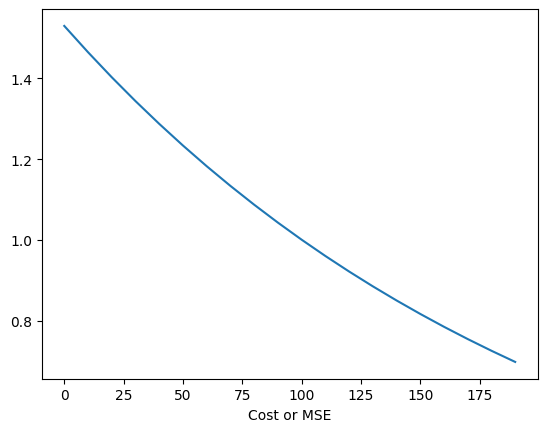

In [23]:
plt.plot( gd_iterations_df['iteration'], gd_iterations_df['cost']);
plt.xlabel("Number of iterations")
plt.xlabel("Cost or MSE")

In [24]:
print("Final estimates of b and w: ", b, w)

Final estimates of b and w:  0.6266382624887261 [0.48270238 0.75265969 0.46109174]


In [25]:
alpha_df_1, b, w = run_gradient_descent(X, Y, alpha = 0.01, num_iterations = 2000)

Final estimate of b and w: -4.125293727283968e-17 [ 0.75306591  0.53648155 -0.00433069]


In [26]:
alpha_df_2, b, w = run_gradient_descent(X, Y, alpha = 0.001, num_iterations = 2000)

Final estimate of b and w: 0.011664695556930216 [0.74315125 0.52779959 0.01171703]


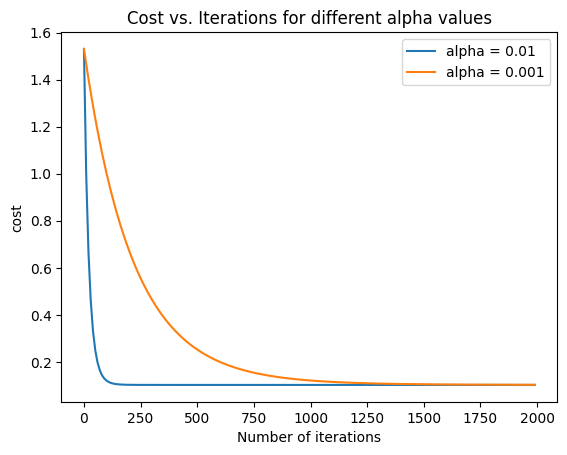

In [27]:
plt.plot( alpha_df_1['iteration'], alpha_df_1['cost'], label = "alpha = 0.01");
plt.plot( alpha_df_2['iteration'], alpha_df_2['cost'], label = "alpha = 0.001");
plt.legend()
plt.ylabel('cost');
plt.xlabel('Number of iterations');
plt.title('Cost vs. Iterations for different alpha values');

#### Scikit Library

In [29]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split( sales_df[["TV", "Radio", "Newspaper"]],
                                                    sales_df.Sales, test_size = 0.3, random_state = 42)

In [30]:
len(X_train)

140

In [31]:
len(X_test)

60

In [32]:
from sklearn.linear_model import LinearRegression

In [33]:
linreg = LinearRegression()
linreg.fit(X_train, Y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [34]:
# intercept(Bias)
linreg.intercept_

2.7089490925159065

In [35]:
# coefficients(weights)
linreg.coef_

array([0.04405928, 0.1992875 , 0.00688245])

In [36]:
# zip() returns a dictionary with variable names mapped to coefficient values
list( zip(["TV", "Radio", "Newspaper"], list(linreg.coef_)))

[('TV', 0.04405928095746522),
 ('Radio', 0.19928749689893954),
 ('Newspaper', 0.006882452222275487)]

#### Making Prediction on Test Set

In [38]:
y_pred = linreg.predict(X_test)

In [39]:
test_pred_df = pd.DataFrame({'actual': Y_test,
                             'predicted': np.round(y_pred, 2),
                             'residuals': Y_test - y_pred})
test_pred_df.sample(10)

,actual,predicted,residuals
126,6.6,11.15,-4.553147
170,8.4,7.35,1.049715
95,16.9,16.57,0.334604
195,7.6,5.22,2.375645
115,12.6,13.36,-0.755569
38,10.1,10.17,-0.070454
56,5.5,8.92,-3.415494
165,11.9,14.30,-2.402060
173,11.7,11.63,0.068431
9,10.6,12.18,-1.576049


#### Measuring Accuracy (RMSE & R-squared)

##### RMSE

In [42]:
from sklearn import metrics

In [43]:
r2 = metrics.r2_score(Y_train, linreg.predict(X_train))
print("R Squared: ", r2)

R Squared:  0.9055159502227753


In [44]:
mse = metrics.mean_squared_error(Y_test, y_pred)

In [45]:
rmse = round(np.sqrt(mse),2)
print("RMSE:", rmse)

RMSE: 1.95


#### Bias_Variance tradeoff

In [47]:
curve = pd.read_csv("curve.csv")
curve.head()

,x,y
0,2,-1.999618
1,2,-1.999618
2,8,-3.978312
3,9,-1.969175
4,10,-0.957770


Text(0, 0.5, 'y values')

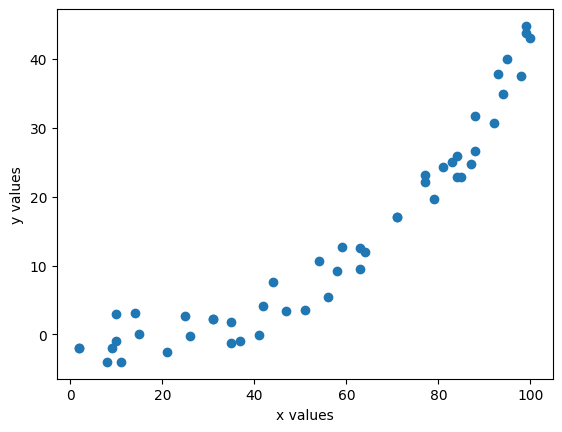

In [48]:
plt.scatter(curve.x, curve.y);
plt.xlabel("x values")
plt.ylabel("y values")

In [49]:
## no linear relationship noticed between x and y, rather a polynomial form

In [62]:
def fit_poly(degree):
    p = np.polyfit( curve.x, curve.y, deg = degree)
    curve['fit'] = np.polyval(p, curve.x)
    sns.regplot( x = curve.x, y = curve.y, fit_reg = False)
    return plt.plot(curve.x, curve.fit, label = 'fit')

##### 1.Fitting the model with Degree(1)

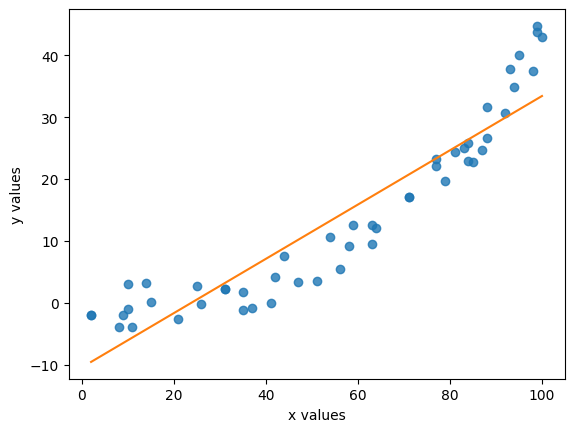

In [64]:
fit_poly(1);
plt.xlabel("x values")
plt.ylabel("y values");

In [66]:
## underfitting in the above model

##### degree(2)

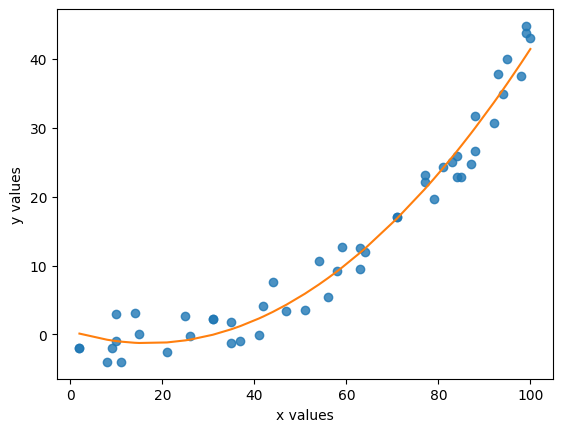

In [71]:
fit_poly(2);
plt.xlabel("x values")
plt.ylabel("y values");

In [73]:
## overfitting

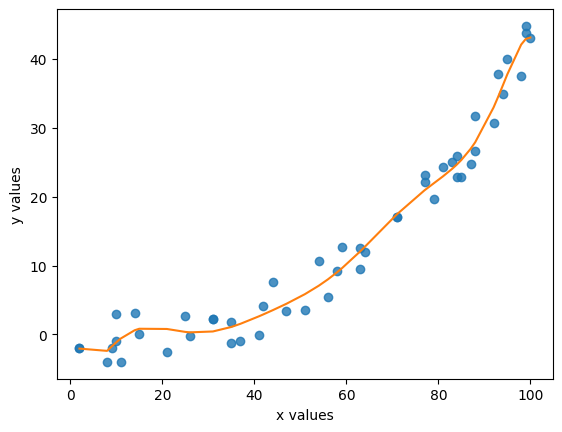

In [75]:
fit_poly(10);
plt.xlabel("x values")
plt.ylabel("y values");

In [81]:
train_X, test_X, train_y, test_y = train_test_split(curve.x, curve.y, test_size = 0.40, random_state = 100)
rmse_df = pd.DataFrame(columns = ["degree","rmse_train","rmse_test"])
def get_rmse(y,y_fit):
    return np.sqrt(metrics.mean_squared_error(y,y_fit))
for i in range(1,15):
    p = np.polyfit(train_X, train_y, deg = i)
    rmse_df.loc[i-1] = [i, get_rmse(train_y, np.polyval(p, train_X)),get_rmse(test_y, np.polyval(p, test_X))]
                    


In [83]:
rmse_df

,degree,rmse_train,rmse_test
0,1.0,5.226638,5.779652
1,2.0,2.394509,2.755286
2,3.0,2.233547,2.560184
3,4.0,2.231998,2.549205
4,5.0,2.197528,2.428728
5,6.0,2.062201,2.703880
6,7.0,2.039408,2.909237
7,8.0,1.995852,3.270892
8,9.0,1.979322,3.120420
9,10.0,1.976326,3.115875


##### plotting test and train error against the degree of the models

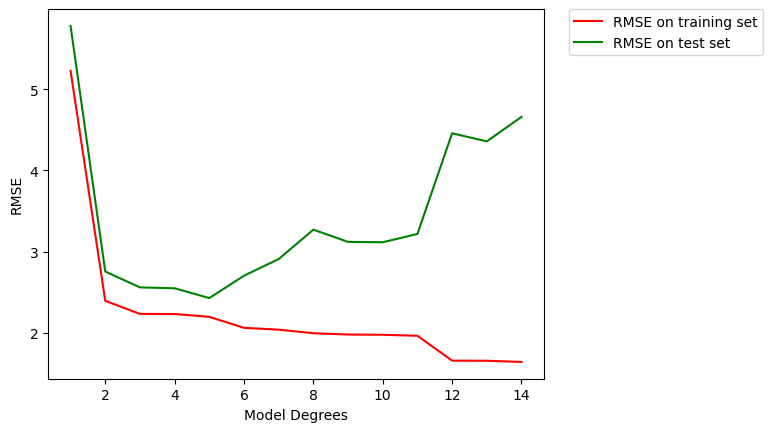

In [88]:
plt.plot(rmse_df.degree, rmse_df.rmse_train, label = 'RMSE on training set', color = 'r')
plt.plot(rmse_df.degree, rmse_df.rmse_test, label = 'RMSE on test set', color = 'g')
plt.legend(bbox_to_anchor = (1.05, 1), loc = 2, borderaxespad = 0.);
plt.xlabel("Model Degrees")
plt.ylabel("RMSE");